Para más información sobre este proyecto, consulta el [README](https://github.com/Dgasensi/Proyectos_Personales/blob/main/README.md) del repositorio.
https://github.com/Dgasensi/Proyectos_Personales/blob/main/README.md

In [29]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

#Importamos la Base de datos
df = pd.read_csv(r'datoskepler\cumulative.csv')
#mostramos todas las columnas
pd.set_option('display.max_columns', None)
df.head()

,rowid,kepid,kepoi_name,kepler_name,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,koi_impact,koi_impact_err1,koi_impact_err2,koi_duration,koi_duration_err1,koi_duration_err2,koi_depth,koi_depth_err1,koi_depth_err2,koi_prad,koi_prad_err1,koi_prad_err2,koi_teq,koi_teq_err1,koi_teq_err2,koi_insol,koi_insol_err1,koi_insol_err2,koi_model_snr,koi_tce_plnt_num,koi_tce_delivname,koi_steff,koi_steff_err1,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,1,10797460,K00752.01,Kepler-227 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,9.488036,2.775000e-05,-2.775000e-05,170.538750,0.002160,-0.002160,0.146,0.318,-0.146,2.95750,0.08190,-0.08190,615.8,19.5,-19.5,2.26,0.26,-0.15,793.0,NaN,NaN,93.59,29.45,-16.65,35.8,1.0,q1_q17_dr25_tce,5455.0,81.0,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,2,10797460,K00752.02,Kepler-227 c,CONFIRMED,CANDIDATE,0.969,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,-0.003520,0.586,0.059,-0.443,4.50700,0.11600,-0.11600,874.8,35.5,-35.5,2.83,0.32,-0.19,443.0,NaN,NaN,9.11,2.87,-1.62,25.8,2.0,q1_q17_dr25_tce,5455.0,81.0,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
2,3,10811496,K00753.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,0,19.899140,1.494000e-05,-1.494000e-05,175.850252,0.000581,-0.000581,0.969,5.126,-0.077,1.78220,0.03410,-0.03410,10829.0,171.0,-171.0,14.60,3.92,-1.31,638.0,NaN,NaN,39.30,31.04,-10.49,76.3,1.0,q1_q17_dr25_tce,5853.0,158.0,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
3,4,10848459,K00754.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,-0.000115,1.276,0.115,-0.092,2.40641,0.00537,-0.00537,8079.2,12.8,-12.8,33.46,8.50,-2.83,1395.0,NaN,NaN,891.96,668.95,-230.35,505.6,1.0,q1_q17_dr25_tce,5805.0,157.0,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
4,5,10854555,K00755.01,Kepler-664 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,2.525592,3.761000e-06,-3.761000e-06,171.595550,0.001130,-0.001130,0.701,0.235,-0.478,1.65450,0.04200,-0.04200,603.3,16.9,-16.9,2.75,0.88,-0.35,1406.0,NaN,NaN,926.16,874.33,-314.24,40.9,1.0,q1_q17_dr25_tce,6031.0,169.0,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509


In [30]:
#Cambio los nombres de las columnas por algo mas familiar y dejo solo las que me interesan para mi analisis

renombrar = {
    'kepid': 'ID estrella',
    'koi_disposition': 'Clasificación',
    'koi_period': 'Período orbital(dias)',
    'koi_srad':'Radio_estrella(R_sol)',
    'koi_prad': 'Radio del planeta(R_tierra)',
    'koi_prad_err1': 'Error(+)radio.planeta',
    'koi_prad_err2': 'Error(-)radio.planeta',
    'koi_teq': 'Temperatura equil.Planeta(K)',
    'koi_teq_err1': 'Error(+)temp.Planeta',
    'koi_teq_err2': 'Error(-)temp.Planeta',
    'koi_model_snr': 'Rel.señal/ruido',
    'koi_steff': 'Temp.Estrella',
    'koi_steff_err1': 'Error(+)temp.Estrella',
    'koi_steff_err2': 'Error(-)temp.Estrella',
    'koi_duration': 'Duración tránsito(horas)'
    }

df_1 = df.rename(columns=renombrar)[list(renombrar.values())]
df_1.head()

,ID estrella,Clasificación,Período orbital(dias),Radio_estrella(R_sol),Radio del planeta(R_tierra),Error(+)radio.planeta,Error(-)radio.planeta,Temperatura equil.Planeta(K),Error(+)temp.Planeta,Error(-)temp.Planeta,Rel.señal/ruido,Temp.Estrella,Error(+)temp.Estrella,Error(-)temp.Estrella,Duración tránsito(horas)
0,10797460,CONFIRMED,9.488036,0.927,2.26,0.26,-0.15,793.0,NaN,NaN,35.8,5455.0,81.0,-81.0,2.95750
1,10797460,CONFIRMED,54.418383,0.927,2.83,0.32,-0.19,443.0,NaN,NaN,25.8,5455.0,81.0,-81.0,4.50700
2,10811496,FALSE POSITIVE,19.899140,0.868,14.60,3.92,-1.31,638.0,NaN,NaN,76.3,5853.0,158.0,-176.0,1.78220
3,10848459,FALSE POSITIVE,1.736952,0.791,33.46,8.50,-2.83,1395.0,NaN,NaN,505.6,5805.0,157.0,-174.0,2.40641
4,10854555,CONFIRMED,2.525592,1.046,2.75,0.88,-0.35,1406.0,NaN,NaN,40.9,6031.0,169.0,-211.0,1.65450


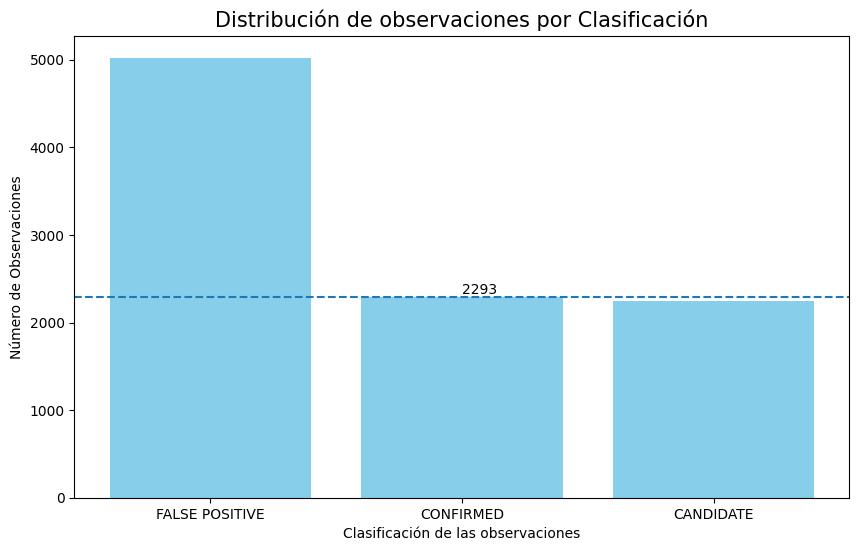

In [31]:
import matplotlib.pyplot as plt

# Contamos cuántos elementos hay en cada tipo hay en  'Clasificación': Para esta prueba solo utilizare los CONFIRMADOS
conteo_clasificacion = df_1['Clasificación'].value_counts()

# Obtenemos categorías (eje X) y los conteos (eje y) para plotear los resultados
categorias = conteo_clasificacion.index
valores = conteo_clasificacion.values

#Gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(categorias, valores, color='skyblue')
#trazo una linea identificativa sobre los confirmados con su valor en texto
plt.axhline(y=2293, linestyle='--')
plt.text(1, 2293,'2293', ha='left', va = 'bottom')
#título y etiquetas
plt.title('Distribución de observaciones por Clasificación', fontsize=15)
plt.xlabel('Clasificación de las observaciones')
plt.ylabel('Número de Observaciones')
plt.show()


### Observaciones:

-De las 9564 observaciones,  2293 son exoplanetas confirmados

In [32]:
##############################################Limpieza de los datos##########################################

#Filtramos el df: solo observaciones confirmadas // Elimino otras columnas innecesarias por su gran cantidad de NaN y bajo valor predictivo(para esta pruebecilla, claro esta)
columnas_eliminar = ['Error(+)radio.planeta', 'Error(-)radio.planeta', 'Error(+)temp.Planeta', 'Error(-)temp.Planeta', 'Error(+)temp.Estrella', 'Error(-)temp.Estrella', 'Rel.señal/ruido']
df_limpio_1 = df_1[df_1['Clasificación'] == 'CONFIRMED'].drop(columns=columnas_eliminar)

#Busqueda y eliminacion de NaN que queden
df_limpio_1.isna().any(axis=1)      #busqueda por columnas
print(df_limpio_1[df_limpio_1.isna().any(axis=1)])
#Se observa que en la linea 2138 coinciden los 4 Nan que quedan
df_final = df_limpio_1.drop(index=2183)
print('''
      -------------------------------------------------------------------------------------------------------------------------------------------------
     ''')
print(df_final[df_final.isna().any(axis=1)])   #Limpio, por fin
#Resultado
df_final.head()

      ID estrella Clasificación  Período orbital(dias)  Radio_estrella(R_sol)  \
2183      8478994     CONFIRMED              51.206903                    NaN   

      Radio del planeta(R_tierra)  Temperatura equil.Planeta(K)  \
2183                          NaN                           NaN   

      Temp.Estrella  Duración tránsito(horas)  
2183            NaN                      8.99  

      -------------------------------------------------------------------------------------------------------------------------------------------------
     
Empty DataFrame
Columns: [ID estrella, Clasificación, Período orbital(dias), Radio_estrella(R_sol), Radio del planeta(R_tierra), Temperatura equil.Planeta(K), Temp.Estrella, Duración tránsito(horas)]
Index: []


,ID estrella,Clasificación,Período orbital(dias),Radio_estrella(R_sol),Radio del planeta(R_tierra),Temperatura equil.Planeta(K),Temp.Estrella,Duración tránsito(horas)
0,10797460,CONFIRMED,9.488036,0.927,2.26,793.0,5455.0,2.9575
1,10797460,CONFIRMED,54.418383,0.927,2.83,443.0,5455.0,4.5070
4,10854555,CONFIRMED,2.525592,1.046,2.75,1406.0,6031.0,1.6545
5,10872983,CONFIRMED,11.094321,0.972,3.90,835.0,6046.0,4.5945
6,10872983,CONFIRMED,4.134435,0.972,2.77,1160.0,6046.0,3.1402


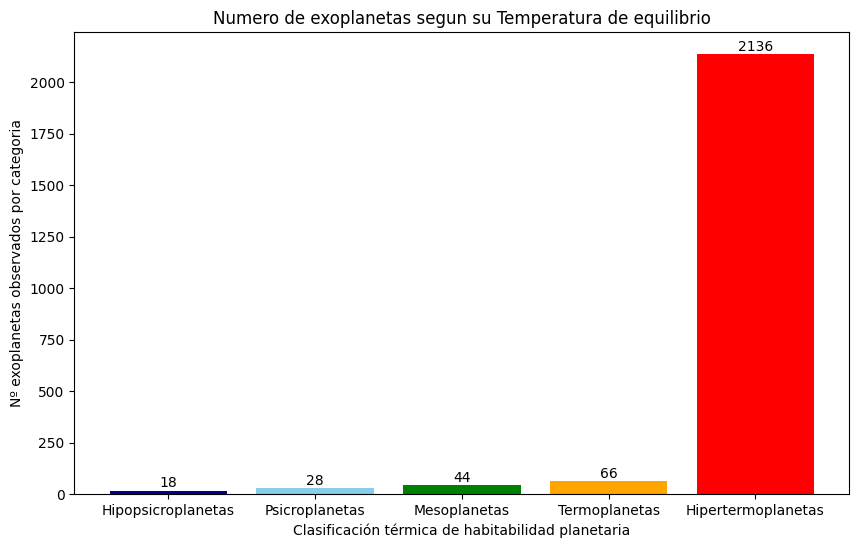

In [33]:
#Categorizamos nuestros datos en funcion a su temperatura de equilibrio

# https://es.wikipedia.org/wiki/Clasificación_térmica_de_habitabilidad_planetaria
# Categorias con las condiciones mas adecuadas para albergar vida: Psicroplanetas y Mesoplanetas
# Con temperaturas entre los -50 °C y los 50 °C, esto es aproximadamente entre 223 y 323 Kelvin
# Categorias con baja probabilidad de albergar vida mas halla de extremofilos o bacterias en oeanos bajo el hielo, segun temperatura 
# Hipopsicroplanetas,  Termoplanetas y Hipertermoplanetas(casi nula) con temperaturas por debajo de -50 °C y por encima de 100 °C


Hipopsicroplanetas = df_final[df_final['Temperatura equil.Planeta(K)'] < 223]
Psicroplanetas = df_final[(df_final['Temperatura equil.Planeta(K)'] >= 223) & (df_final['Temperatura equil.Planeta(K)'] < 273)]
Mesoplanetas = df_final[(df_final['Temperatura equil.Planeta(K)'] >= 273) & (df_final['Temperatura equil.Planeta(K)'] <= 323)]
Termoplanetas = df_final[(df_final['Temperatura equil.Planeta(K)'] > 323) & (df_final['Temperatura equil.Planeta(K)'] <= 373)] 
Hipertermoplanetas = df_final[df_final['Temperatura equil.Planeta(K)'] > 373]


#Graficamos los resultados
categorias = ['Hipopsicroplanetas', 'Psicroplanetas', 'Mesoplanetas', 'Termoplanetas', 'Hipertermoplanetas']
conteo_categorias = [len(Hipopsicroplanetas), len(Psicroplanetas), len(Mesoplanetas), len(Termoplanetas), len(Hipertermoplanetas)]
colores = ['darkblue', 'skyblue', 'green', 'orange', 'red']
plt.figure(figsize=(10, 6))
barras = plt.bar(categorias, conteo_categorias, color=colores)
plt.title('Numero de exoplanetas segun su Temperatura de equilibrio')
plt.xlabel('Clasificación térmica de habitabilidad planetaria')
plt.ylabel('Nº exoplanetas observados por categoria')
for barra in barras:
    yval = barra.get_height()
    plt.text(barra.get_x() + barra.get_width()/2, yval + 1, yval, ha='center', va='bottom')



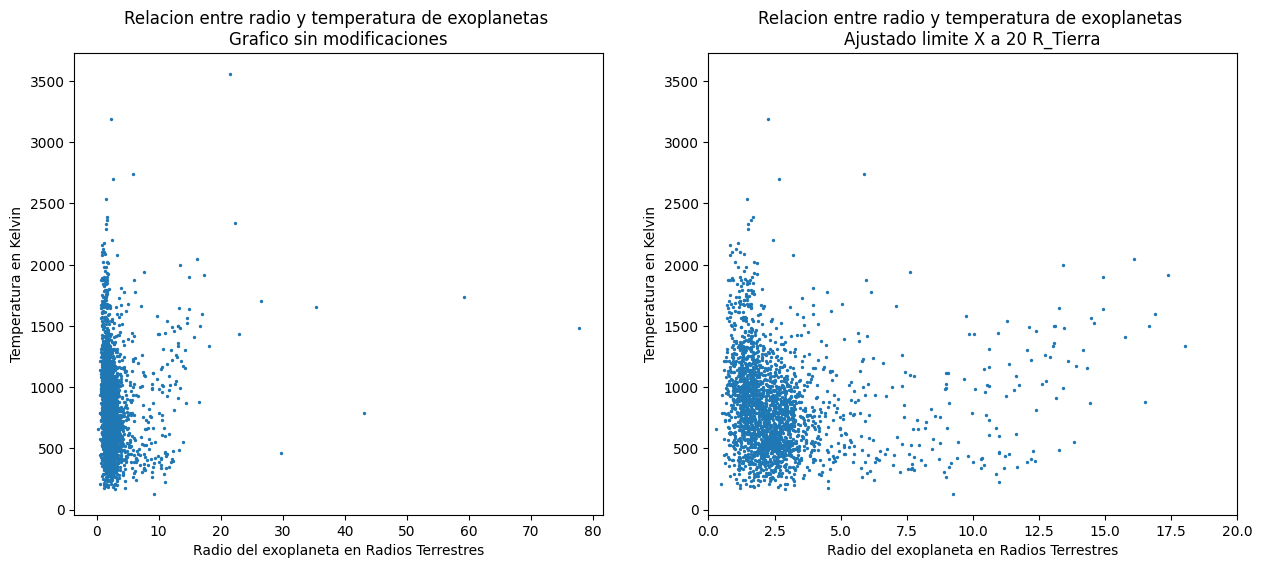

In [34]:
# Relacion entre tamaño y temperatura de los exoplanetas confirmados

fig, axs= plt.subplots(1,2, figsize=(15, 6))
axs[0].scatter(df_final['Radio del planeta(R_tierra)'],df_final['Temperatura equil.Planeta(K)'], s=2)
axs[0].set_xlabel('Radio del exoplaneta en Radios Terrestres')
axs[0].set_ylabel('Temperatura en Kelvin')
axs[0].set_title('''Relacion entre radio y temperatura de exoplanetas 
Grafico sin modificaciones''')

axs[1].scatter(df_final['Radio del planeta(R_tierra)'],df_final['Temperatura equil.Planeta(K)'], s=2)
axs[1].set_xlim(0, 20)
axs[1].set_xlabel('Radio del exoplaneta en Radios Terrestres')
axs[1].set_ylabel('Temperatura en Kelvin')
axs[1].set_title('''Relacion entre radio y temperatura de exoplanetas 
Ajustado limite X a 20 R_Tierra''')
plt.show()


,ID estrella,Período orbital(dias),Radio_estrella(R_sol),Radio del planeta(R_tierra),Temperatura equil.Planeta(K),Temp.Estrella,Duración tránsito(horas)
count,2.292000e+03,2292.000000,2292.000000,2292.000000,2292.000000,2292.000000,2292.000000
mean,8.100614e+06,27.052677,1.066548,2.871571,839.125654,5477.974258,4.306581
std,2.584692e+06,54.028035,0.642967,3.361129,386.740567,677.133088,2.720317
min,7.574500e+05,0.341842,0.118000,0.270000,129.000000,2703.000000,0.427900
25%,6.147112e+06,5.082076,0.807750,1.530000,554.000000,5171.000000,2.514375
50%,8.353888e+06,11.311964,0.968000,2.170000,781.000000,5616.000000,3.576500
75%,1.018702e+07,25.454658,1.200000,2.940000,1039.000000,5929.500000,5.304000
max,1.283487e+07,1071.232624,19.530000,77.760000,3559.000000,9565.000000,24.420000


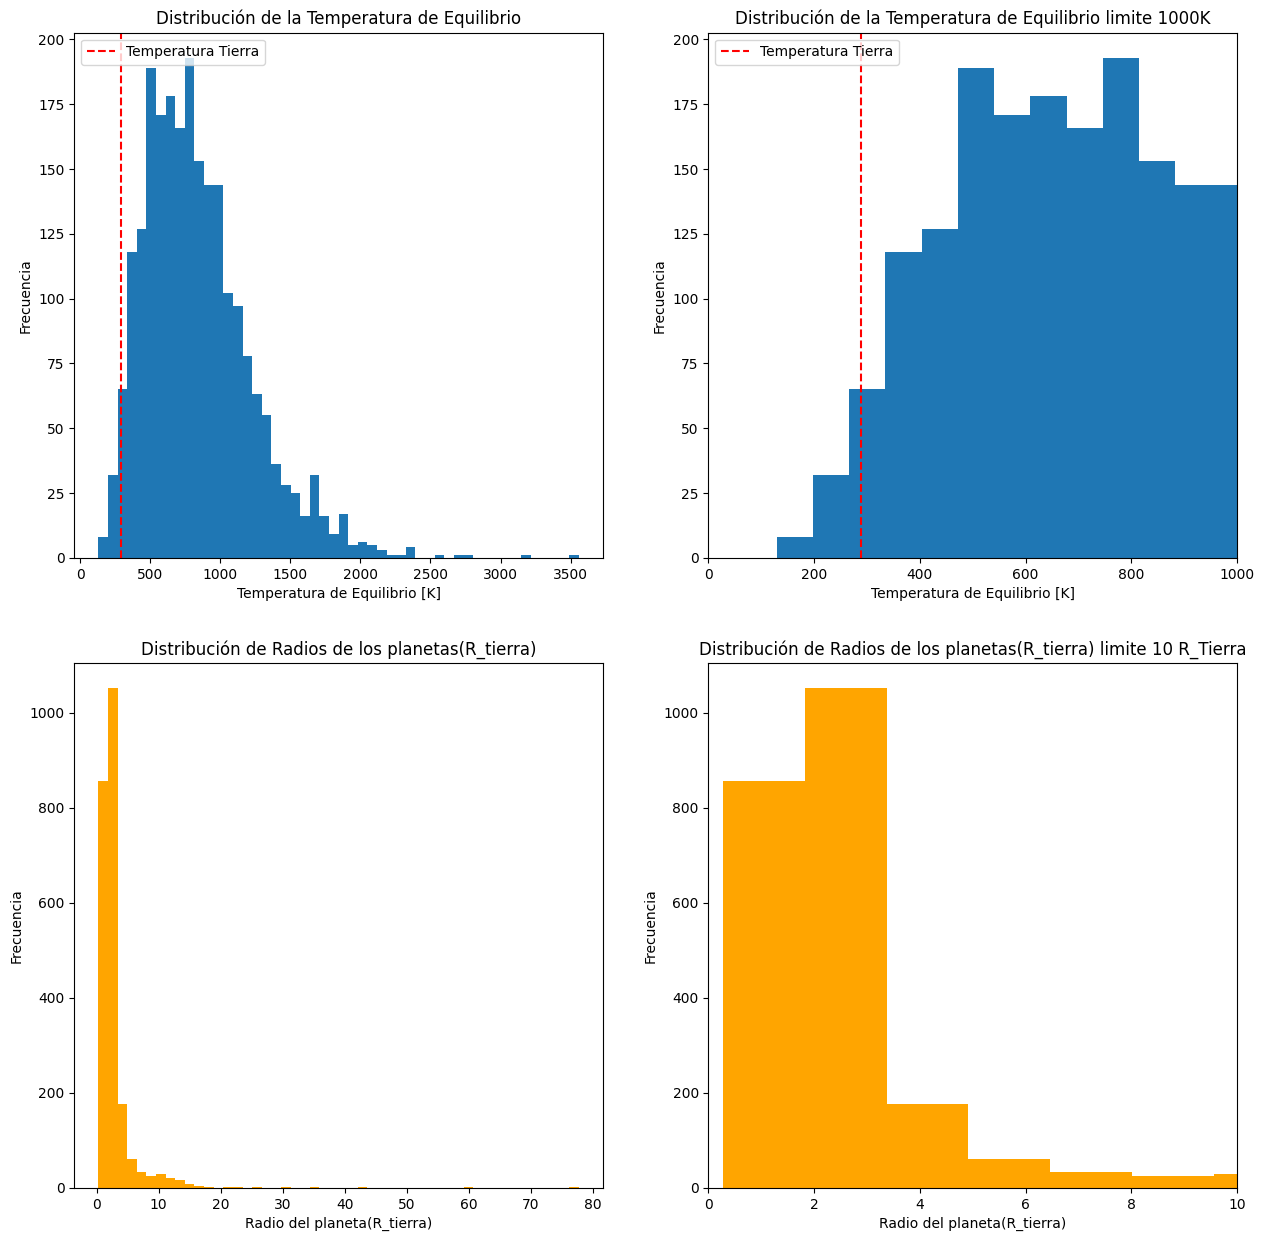

In [35]:
#################################realizamos el analisis exploratorio de datos###########################################

#resumen estadistico
display(df_final.describe())

#distribucion de variables clave en histogramas
fig, axs= plt.subplots(2,2, figsize=(15,15))
axs[0, 0].hist(df_final['Temperatura equil.Planeta(K)'], bins=50)
axs[0,0].set_title('Distribución de la Temperatura de Equilibrio')
axs[0,0].set_xlabel('Temperatura de Equilibrio [K]')
axs[0, 0].set_ylabel('Frecuencia')
axs[0, 0].axvline(x=288, color='r', linestyle='--', label='Temperatura Tierra')
axs[0, 0].legend(loc='upper left')

#zOOM
axs[0, 1].hist(df_final['Temperatura equil.Planeta(K)'], bins=50)
axs[0,1].set_title('Distribución de la Temperatura de Equilibrio limite 1000K')
axs[0,1].set_xlabel('Temperatura de Equilibrio [K]')
axs[0, 1].set_ylabel('Frecuencia')
axs[0, 1].axvline(x=288, color='r', linestyle='--', label='Temperatura Tierra')
axs[0, 1].legend(loc='upper left')
axs[0, 1].set_xlim(0, 1000)

axs[1,0].hist(df_final['Radio del planeta(R_tierra)'], color='orange', bins=50)
axs[1,0].set_title('Distribución de Radios de los planetas(R_tierra)')
axs[1,0].set_xlabel('Radio del planeta(R_tierra)')
axs[1,0].set_ylabel('Frecuencia')
#Zoom
axs[1,1].hist(df_final['Radio del planeta(R_tierra)'], color='orange', bins=50)
axs[1,1].set_title('Distribución de Radios de los planetas(R_tierra) limite 10 R_Tierra')
axs[1,1].set_xlabel('Radio del planeta(R_tierra)')
axs[1, 1].set_ylabel('Frecuencia')
axs[1, 1].set_xlim(0, 10)
plt.show()


##Conclusiones

Si observamos las gráficas podemos concluir que la mayoría de los planetas observados son algo más grandes que la tierra pero sobre todo mucho más calientes que la tierra Esto puede tener que ver con el método de observación basado en tránsitos, que básicamente es lo que llamaríamos un eclipse y en que para poder observar la reducción de luminosidad que provoca un planeta sobre su estrella anfitriona, la relación de tamaños o de distancia tiene que ser la adecuada a nuestros límites de observación. Es por eso que, antes de que proseguir con el análisis, quiero dejar claro que esto es sólo una práctica y que en ningún caso tiene capacidad predictiva real ya que la muestra está extremadamente Sesgada.

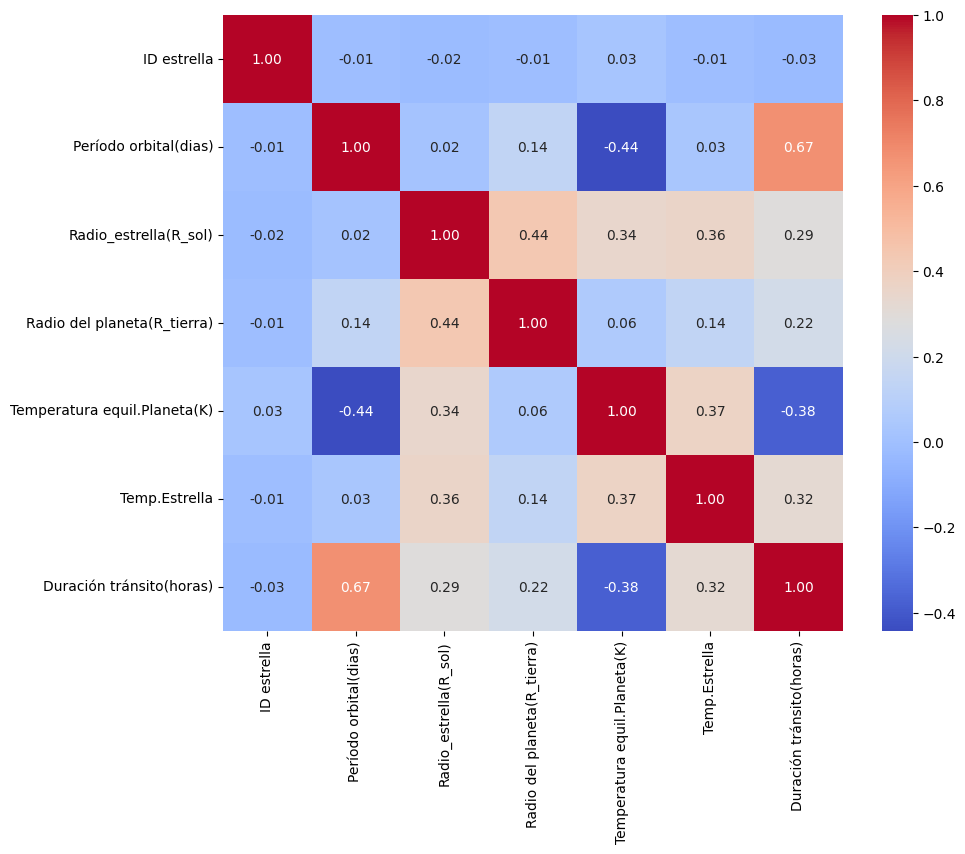

In [36]:
#Mapa de correlaciones para buscar variables con valor predictivo
#df_final_corr filtra y proporciona solo los datos numericos
df_final_corr = df_final.select_dtypes(include=['number'])
corr_matrix = df_final_corr.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.show()

#### En base al heatmap escojemos como variables predictivas 

- El radio del planeta: asumimos que planetas por encima de dos radios tierra no son planetas rocosos y no albergan vida(eso es mucho asumir pero recordemos que es una práctica)

- El radio de la estrella: Asumimos que estrellas con radio mas proximo a nuestro sol favoreceran las condiciones para la vida

- El periodo orbital: Asumimos que periodos orbitales similares a los de la tierra, siempre teniendo en cuenta las variables anteriores, favoreceran las condiciones para la vida

- La temperatura de equilibrio del planeta: El factor excluyente y filtro de todos los demas. Asumimos que por debajo de -50 C (Agua liquida, aun subterranea) y por encima de 100 C no hay vida(se han detectado organisos extremofilos en ambientes con temperaturas alrededor de los 120 C).

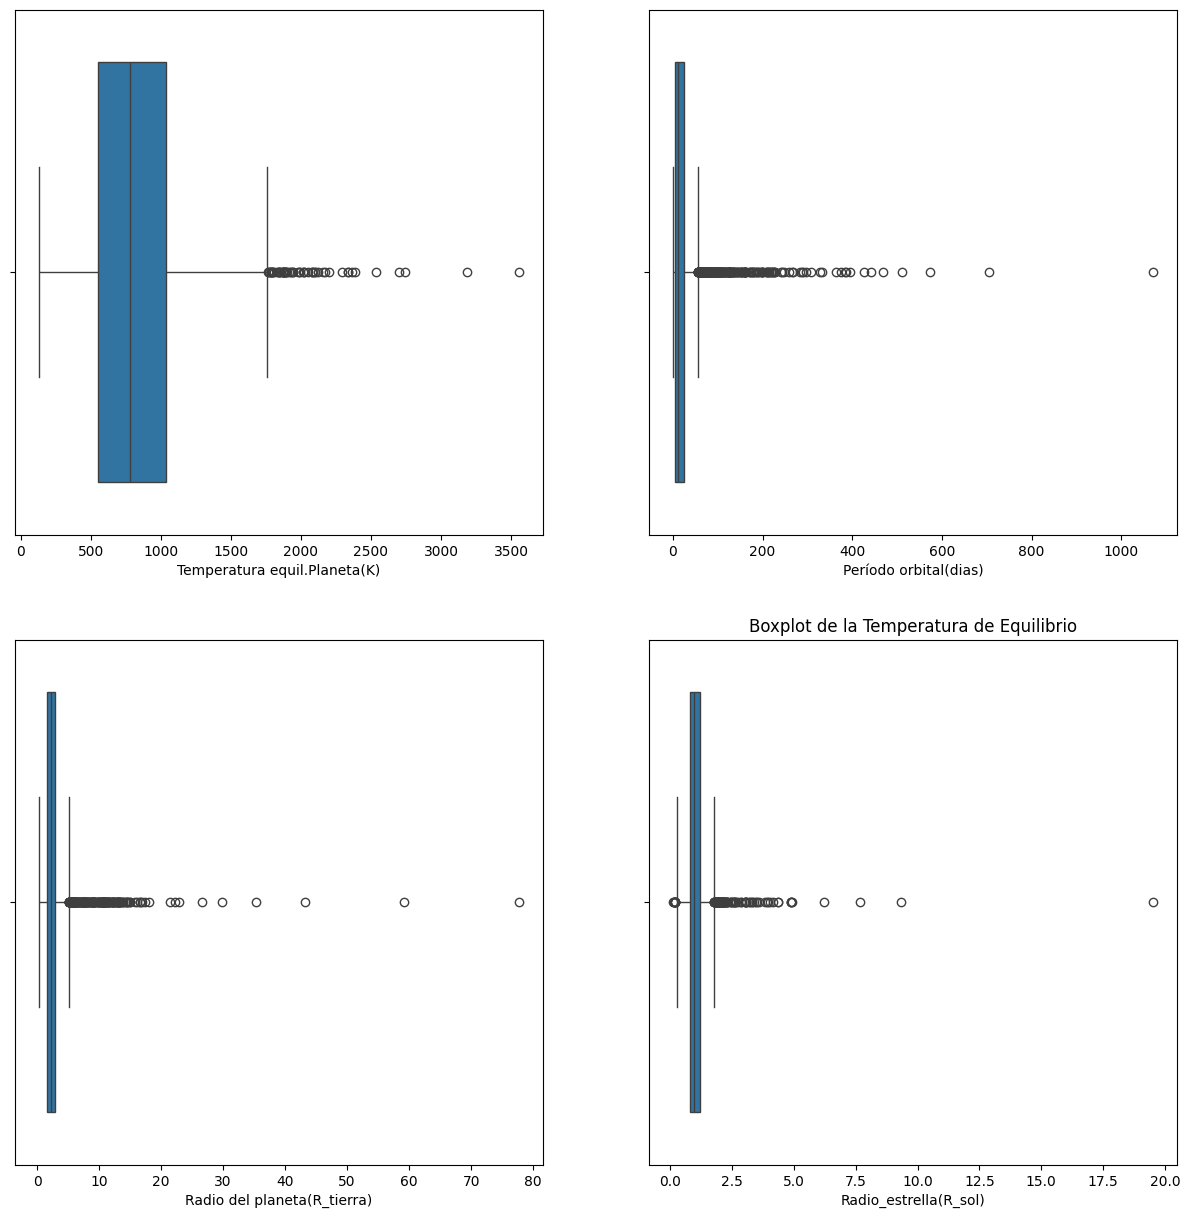

In [37]:
#graficamos esas caracteristicas
fig, axs= plt.subplots(2, 2, figsize=(15, 15))
sns.boxplot(x=df_final['Temperatura equil.Planeta(K)'], ax=axs[0, 0])
sns.boxplot(x=df_final['Período orbital(dias)'], ax=axs[0, 1])
sns.boxplot(x=df_final['Radio_estrella(R_sol)'], ax=axs[1, 1])
sns.boxplot(x=df_final['Radio del planeta(R_tierra)'], ax=axs[1, 0])
plt.title('Boxplot de la Temperatura de Equilibrio')
plt.show()

Como apuntaba antes, es muy poco probable que la muestra sea significativa. Se observan outliers pero dado lo limitado de la muestra y la finalidad de esta practica no los eliminaremos.

In [38]:
#incluimos en el Dataframe a la tierra que sera nuestro 10 de 10 en habitabilidad
datos_tierra = {
    'Temperatura equil.Planeta(K)': 288,  # Asumiendo 288 K como la temperatura de equilibrio de la Tierra
    'Radio del planeta(R_tierra)': 1, 
    'Período orbital(dias)': 365,  
    'Radio_estrella(R_sol)': 1,
    'ID estrella': 'Sol',
    'Clasificación': 'Tierra',
    'Temp.Estrella': 5773, 
    'Duración tránsito(horas)': 0
          
}


df_finale = pd.concat([pd.DataFrame([datos_tierra]), df_final], ignore_index=True)

In [39]:
#Definimos una funcion para calcular la habitabilidad de los planetas
temperatura_optima_min = 223
temperatura_optima_max = 323
radio_optimo = 1
periodo_optimo = 365
radio_est_optimo = 1

#la función se basa en el rango de temperaturas aceptable (-50, 50) y solo si nos encontramos dentro de ese rango valorara el resto de caracteristicas.
#Se puntua cada caracteristica aplicando una transformacion exponencial decreciente a la diferencia absoluta entre el valor y su optimo normalizada en terminos del optimo.

def puntuacion_habitabilidad(row):
    if temperatura_optima_min <= row['Temperatura equil.Planeta(K)'] <= temperatura_optima_max:
      puntuacion_radio = np.exp(-np.abs(row['Radio del planeta(R_tierra)']-radio_optimo)/radio_optimo)
      puntuacion_radio_est = np.exp(-np.abs(row['Radio_estrella(R_sol)']-radio_est_optimo)/radio_est_optimo)
      puntuacion_p_orbital = np.exp(-np.abs(row['Período orbital(dias)']-periodo_optimo)/periodo_optimo)

      puntuacion_final = (puntuacion_p_orbital+ puntuacion_radio + puntuacion_radio_est)

      # multiplicar por 10 y dividir por 3 es un capricho para que la puntuacion sea de 0 a 10
      return 10*(puntuacion_final)/3
    else: 
      puntuacion_final = 0
      return puntuacion_final

df_finale['coef_habitabilidad'] = df_finale.apply(puntuacion_habitabilidad, axis=1)
maxx = df_finale['coef_habitabilidad'].max()

aprobados = (df_finale['coef_habitabilidad']>5).sum()
print(f'Hay {aprobados} planetas donde podemos poner un resort')

Hay 43 planetas donde podemos poner un resort


### De las 9564 observaciones, solo 43 cumplen con los criterios minimos que hemos establecido para albergar vida

In [40]:
#Practica con modelo de regresion lineal


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


caracteristicas_habitabilidad = ['Temperatura equil.Planeta(K)','Período orbital(dias)', 'Radio_estrella(R_sol)', 'Radio del planeta(R_tierra)']

# Preparar los datos para el modelo
X = df_finale[caracteristicas_habitabilidad] 
y = df_finale['coef_habitabilidad']

# Divido los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicializar y entrenar el modelo de regresión lineal
modelo = LinearRegression()
modelo.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = modelo.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
print("Error cuadrático medio (MSE):", mse)

# Puedes también querer ver los coeficientes del modelo para entender la influencia de cada característica
print("Coeficientes del modelo:", modelo.coef_)







Error cuadrático medio (MSE): 0.826084799945397
Coeficientes del modelo: [-0.00016006  0.00651532 -0.08063536 -0.00568074]


### Fin de la practica
La regresion lineal no debe ser contemplada porque hasta donde he podido entender el MSE(error cuadratico medio) de 0.82 sobre un coeficiente de habitabilidad de 10, es muy elevado como para considerar las predicciones de este modelo como validas. pero continuare sobre este ejemplo y actualizare a medida que vaya ganando conocimientos sobre el tema.